#**MNIST Handwriten Digit Recognition**




# Data Description
For this problem, we use the MNIST data which is a large database of 70,000 handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label.
Since each image is of 28 x 28 pixels, and each pixel forms a feature, there are 784 features.

## Loading Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # another visualization library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  #SVM classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN classifier
from sklearn.linear_model import LogisticRegression # LogisticRegression classifier
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB # naive_bayes Classifier
from sklearn import tree #Desicion tree classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix


## Loading Data

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",data_home='datasets')

## Data Exploration

In [ ]:
mnist.frame.head() # printing first five columns of the data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


##  Check for missing values

In [ ]:
# there are no missing values in the data columns
mnist.frame.isnull().sum()/len(mnist)*100

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
class       0.0
Length: 785, dtype: float64

In [ ]:
mnist.frame.info() #show informations about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), float64(784)
memory usage: 418.8 MB


In [ ]:
mnist.frame.describe() # discription of the dataset

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Dividing the dataset to data and target

In [ ]:
X = mnist.data.astype('float32') # data
y = mnist.target.astype('int64') # target

In [ ]:
print(X.shape) # shape of data
print(y.shape) # shape of target

(70000, 784)
(70000,)


In [ ]:
order = list(np.sort(y.unique()))  # target classes in order
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Visualizing the number of classes and counts in the datasets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

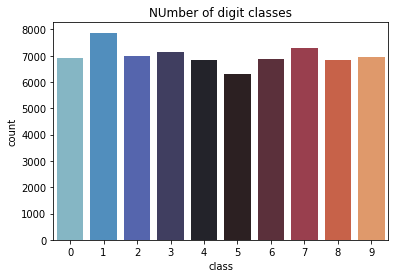

In [ ]:
## Visualizing the number of class and count of each class in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( y, palette = 'icefire')
plt.title('NUmber of digit classes')
y.astype('category').value_counts()

# Plotting some samples as well as converting into matrix

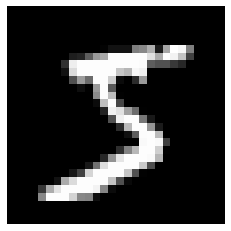

In [ ]:
sample_digit = X.iloc[0] # first instance which is five
sample_digit_image = sample_digit.values.reshape(28, 28) # reshape it from (784,) to (28,28)
plt.imshow(sample_digit_image, # plot it as an image
            cmap='gray',
           interpolation="nearest")
plt.axis("off")
plt.show()

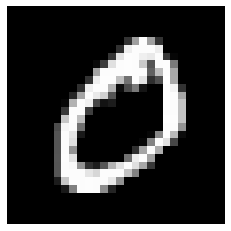

In [ ]:
sample_digit = X.iloc[1] # second instance which is zero
sample_digit_image = sample_digit.values.reshape(28, 28) # reshape it from (784,) to (28,28)
plt.imshow(sample_digit_image, # plot it as an image
            cmap='gray',
           interpolation="nearest")
plt.axis("off")
plt.show()

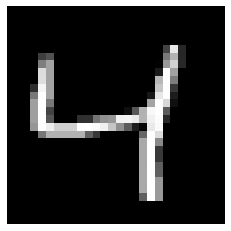

In [ ]:
sample_digit = X.iloc[2] # third instance which is four
sample_digit_image = sample_digit.values.reshape(28, 28) # reshape it from (784,) to (28,28)
plt.imshow(sample_digit_image, # plot it as an image
            cmap='gray',
           interpolation="nearest")
plt.axis("off")
plt.show()

# Data Preprocessing


## Feature Scaling / Normalization
Working with numerical data that is in between 0-1 is more effective for most of the machine learning algortihms than 0-255.
We can easily scale our features to 0-1 range by dividing to max value (255).


In [ ]:
X = X/255.0

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 784)
(14000, 784)
(56000,)
(14000,)


# **Model Building**

## Support Vector Classifier (SVM)

In [ ]:
# an initial SVM model with linear kernel
# gamma is Regularization parameter

# instantiate SVM classifier with linear kernel  C=1.0 , gamma = 'auto'
svm_linear = SVC(kernel='linear', gamma='auto', random_state=42, verbose=True)

# fit classifier to training set
svm_linear.fit(X_train, y_train) # fit


[LibSVM]

SVC(gamma='auto', kernel='linear', random_state=42, verbose=True)

In [ ]:
# make predictions on test set
y_pred = svm_linear.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9352857142857143 

[[1382    1    3    3    2   11   12    1    3    3]
 [   0 1492    6    4    0    2    0    3    6    2]
 [  10   11 1331   19    9    6   11   19   18    4]
 [   6    9   25 1326    2   25    3   10   23    7]
 [   5    3   17    4 1302    1    8    8    3   40]
 [  16    8    9   48    5 1123   18    0   18    3]
 [   6    3   13    0   10   22 1243    0    5    1]
 [   4    7   20    6   18    4    2 1377    3   32]
 [  14   26   17   29    5   26    9    1 1233   12]
 [   7    7    9   12   29   11    0   34    9 1285]]


## Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svm_linear.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_linear.score(X_test, y_test)))

Training set score: 0.9730
Test set score: 0.9353


In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1421
           1       0.95      0.98      0.97      1515
           2       0.92      0.93      0.92      1438
           3       0.91      0.92      0.92      1436
           4       0.94      0.94      0.94      1391
           5       0.91      0.90      0.91      1248
           6       0.95      0.95      0.95      1303
           7       0.95      0.93      0.94      1473
           8       0.93      0.90      0.92      1372
           9       0.93      0.92      0.92      1403

    accuracy                           0.94     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.94      0.94      0.94     14000



# KNN Model

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [ ]:
# n_neighbors is the number of neighbors
# metric is distance metric
# p hyperparameter related to metric
knn=KNeighborsClassifier(n_neighbors=2,metric='euclidean',p=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2, p=4)

In [ ]:
# make predictions on test set
y_pred = knn.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9674285714285714 

[[1415    0    0    0    0    1    3    1    1    0]
 [   0 1511    2    0    1    0    0    1    0    0]
 [  15   17 1383    3    2    0    1   13    3    1]
 [   3    3   15 1397    1    3    0    8    3    3]
 [   4   13    1    0 1358    0    4    1    0   10]
 [   7    4    0   26    2 1202    5    0    1    1]
 [   6    3    0    1    3   10 1280    0    0    0]
 [   1   22    5    2    4    0    0 1431    1    7]
 [   9   18    9   29    9   26    9    6 1252    5]
 [   3    2    1    9   29   10    1   31    2 1315]]


### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9846
Test set score: 0.9674


In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1421
           1       0.95      1.00      0.97      1515
           2       0.98      0.96      0.97      1438
           3       0.95      0.97      0.96      1436
           4       0.96      0.98      0.97      1391
           5       0.96      0.96      0.96      1248
           6       0.98      0.98      0.98      1303
           7       0.96      0.97      0.97      1473
           8       0.99      0.91      0.95      1372
           9       0.98      0.94      0.96      1403

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### confusion matrix

Text(69.0, 0.5, 'Truth')

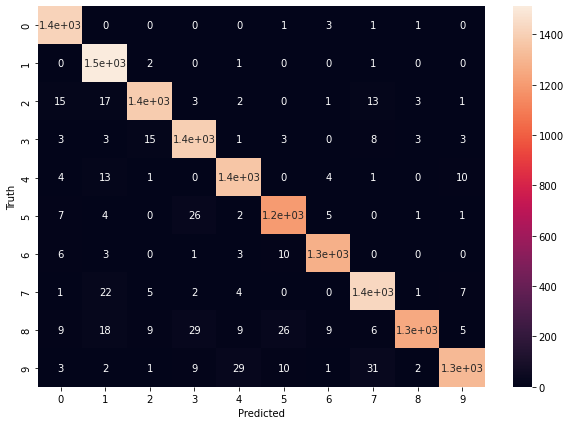

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Logistic Regression Model

In [ ]:
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', # ridge regression
                        solver = 'saga', # optimizer
                        max_iter=1000, # maximum number of iterations taken for the solvers to converge
                        C=50) # regularization term

# fit classifier to training set
clf.fit(X_train, y_train) # fit

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=50, max_iter=1000, solver='saga')

In [ ]:
# make predictions on test set
y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9212857142857143 

[[1366    0    8    4    2   14   12    3    7    5]
 [   0 1472    7    5    1   12    1    2   13    2]
 [   6   19 1291   26   12    9   19   22   27    7]
 [   4    3   30 1300    1   43    4   18   23   10]
 [   5    4   14    3 1287    2   14    4   14   44]
 [  12    4    5   41    9 1096   34    4   37    6]
 [   3    4    6    0   13   24 1242    2    8    1]
 [   3    3   21   11    8    2    2 1367    6   50]
 [  16   27   20   39    4   35   13    2 1199   17]
 [   4    5    5   21   28    8    0   43   11 1278]]


### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9361
Test set score: 0.9213


In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1421
           1       0.96      0.97      0.96      1515
           2       0.92      0.90      0.91      1438
           3       0.90      0.91      0.90      1436
           4       0.94      0.93      0.93      1391
           5       0.88      0.88      0.88      1248
           6       0.93      0.95      0.94      1303
           7       0.93      0.93      0.93      1473
           8       0.89      0.87      0.88      1372
           9       0.90      0.91      0.91      1403

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



### confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# RandomForest model

In [ ]:
rf_clf = RandomForestClassifier() # using it's defult hyperparameters

# fit classifier to training set
rf_clf.fit(X_train, y_train) # fit

RandomForestClassifier()

In [ ]:
# make predictions on test set
y_pred = rf_clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9677142857142857 

[[1401    0    1    0    0    3   10    1    4    1]
 [   0 1494    8    3    0    3    2    1    2    2]
 [   4    2 1390    7    5    0    2   14   13    1]
 [   5    1   19 1374    1    9    0   12   13    2]
 [   5    1    4    0 1337    0    7    4    6   27]
 [   3    0    0   14    3 1207    7    1    7    6]
 [   5    3    0    0    3   12 1278    0    2    0]
 [   1    6   19    3    5    0    0 1412    4   23]
 [   2    6    8    4    6   11    8    0 1317   10]
 [   2    2    2   15   16    6    2   11    9 1338]]


### Check for overfitting and underfitting


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf_clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9677


In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1421
           1       0.99      0.99      0.99      1515
           2       0.96      0.97      0.96      1438
           3       0.97      0.96      0.96      1436
           4       0.97      0.96      0.97      1391
           5       0.96      0.97      0.97      1248
           6       0.97      0.98      0.98      1303
           7       0.97      0.96      0.96      1473
           8       0.96      0.96      0.96      1372
           9       0.95      0.95      0.95      1403

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### confusion matrix

Text(69.0, 0.5, 'Truth')

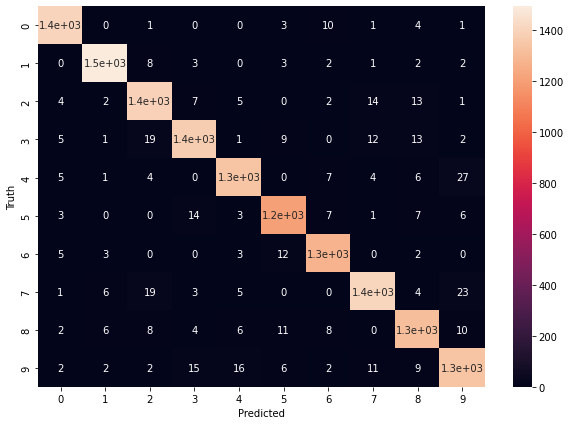

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree

In [ ]:
# criterion :The function to measure the quality of a split.
# max_depth :The maximum depth of the tree
#min_samples_split :The minimum number of samples required to split an internal node
# splitter :strategy used to choose the split at each node.
#random_state :Controls the randomness of the estimator
Dt_clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=50, min_samples_split=5,random_state=40)

# fit classifier to training set
Dt_clf.fit(X_train, y_train) # fit

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_split=5,
                       random_state=40, splitter='random')

In [ ]:
# make predictions on test set
y_pred = Dt_clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8742857142857143 

[[1324    2   23   14    5   18   16    6    7    6]
 [   1 1462    8    8    4    4    2   13   10    3]
 [  22   13 1224   36   23   16   28   36   29   11]
 [  14   12   42 1213    7   61    6   14   37   30]
 [  11    5   15    4 1198   16   22   10   32   78]
 [  18   15   14   67   16 1022   24    7   42   23]
 [  18    6   16    6   30   33 1172    3   16    3]
 [   2   14   33   15   17   10    2 1337   11   32]
 [  20   16   42   38   32   36   29   16 1112   31]
 [   6    5   18   28   68   19    7   41   35 1176]]


### Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(Dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(Dt_clf.score(X_test, y_test)))

Training set score: 0.9833
Test set score: 0.8743


In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1421
           1       0.94      0.97      0.95      1515
           2       0.85      0.85      0.85      1438
           3       0.85      0.84      0.85      1436
           4       0.86      0.86      0.86      1391
           5       0.83      0.82      0.82      1248
           6       0.90      0.90      0.90      1303
           7       0.90      0.91      0.90      1473
           8       0.84      0.81      0.82      1372
           9       0.84      0.84      0.84      1403

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



### Confusion Matrix

Text(69.0, 0.5, 'Truth')

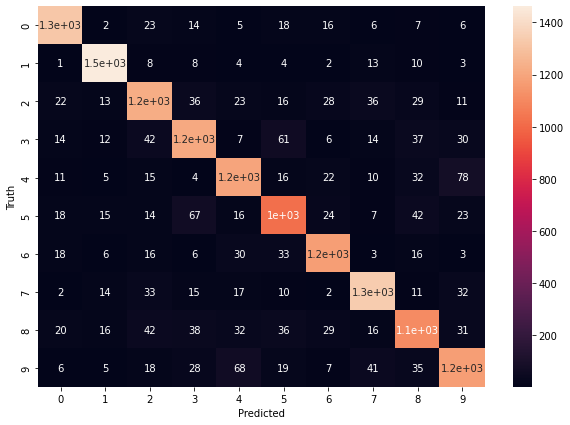

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Naive Bayes

In [ ]:
#fit_prior :Whether to learn class prior probabilities or not
Nb_clf = BernoulliNB(fit_prior=True)

# fit classifier to training set
Nb_clf.fit(X_train, y_train) # fit

BernoulliNB()

In [ ]:
# make predictions on test set
y_pred = Nb_clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.8344285714285714 

[[1272    2    8    9    1   70   23    1   33    2]
 [   0 1454   14    3    1   18    5    0   19    1]
 [  25   18 1176   39   26    8   66   20   58    2]
 [  14   37   61 1167    5   25   15   21   57   34]
 [   4   10   13    0 1100    7   20    5   34  198]
 [  45   19   11  157   36  892   29    4   24   31]
 [  11   31   18    0   12   41 1178    0   11    1]
 [   6   31   12    7   42    1    1 1247   29   97]
 [  24   51   20  112   16   33    8    4 1058   46]
 [  18   17    7   15  103    5    0   64   36 1138]]


## Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(Nb_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(Nb_clf.score(X_test, y_test)))

Training set score: 0.8332
Test set score: 0.8344


In [ ]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1421
           1       0.87      0.96      0.91      1515
           2       0.88      0.82      0.85      1438
           3       0.77      0.81      0.79      1436
           4       0.82      0.79      0.80      1391
           5       0.81      0.71      0.76      1248
           6       0.88      0.90      0.89      1303
           7       0.91      0.85      0.88      1473
           8       0.78      0.77      0.77      1372
           9       0.73      0.81      0.77      1403

    accuracy                           0.83     14000
   macro avg       0.84      0.83      0.83     14000
weighted avg       0.84      0.83      0.83     14000



## Confusion Matrix

Text(69.0, 0.5, 'Truth')

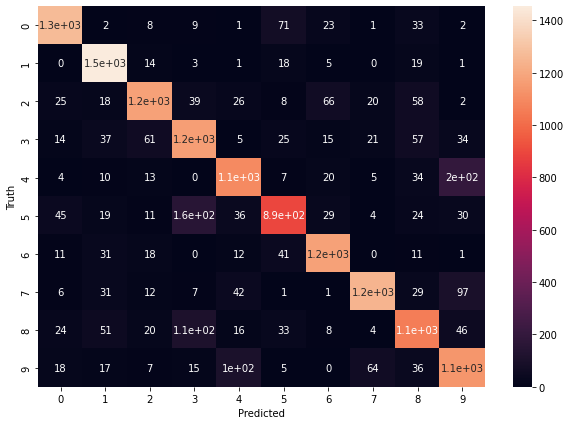

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')